In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

In [2]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
data = pd.read_csv('cf-df.csv',index_col=0)
data = reduce_mem_usage(data)

Memory usage of dataframe is 400000000.00 MB
Memory usage after optimization is: 102028224.00 MB
Decreased by 74.5%


In [4]:
pd.set_option('display.max_columns', None)
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,n0,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,creditY,grade_target_mean,subGrade_target_mean
0,0,35000,5,19.515625,918.0000,E,E2,320.0,2.0,2,110000.0,2,7.0,1,1,137.0,32,17.046875,0,730,734,7,0,0.0,24178,48.90625,27,0,0,2001-08-01,1.0,0.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,2588.0,12,0.105896,0.102295
1,1,18000,5,18.484375,462.0000,D,D2,219843.0,5.0,0,46000.0,2,5.0,0,0,156.0,18,27.828125,0,700,704,13,0,0.0,15096,38.90625,18,1,0,2002-05-01,1723.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1888.0,10,0.042664,0.035522
2,2,12000,5,16.984375,298.2500,D,D3,31698.0,8.0,0,74000.0,2,8.0,0,0,337.0,14,22.765625,0,675,679,11,0,0.0,4606,51.81250,27,0,0,2006-05-01,0.0,0.0,0.0,3.0,0.0,0.0,21.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3044.0,9,0.042664,0.044342
3,3,11000,3,7.261719,341.0000,A,A4,46854.0,10.0,1,118000.0,1,8.0,0,4,148.0,11,17.203125,0,685,689,9,0,0.0,9948,52.59375,28,1,0,1999-05-01,4.0,6.0,4.0,6.0,4.0,16.0,4.0,7.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,2984.0,16,-0.151733,-0.146729
4,4,3000,3,12.992188,101.0625,C,C2,54.0,NaN,1,29000.0,2,9.0,0,10,301.0,21,32.156250,0,690,694,12,0,0.0,2942,32.00000,27,0,0,1977-08-01,11.0,1.0,2.0,7.0,2.0,4.0,9.0,10.0,15.0,0.0,0.0,0.0,0.0,0.0,4.0,3196.0,38,-0.019714,-0.034882


## slicing会出问题

In [5]:
from sklearn.model_selection import KFold
# 分离数据集，方便进行交叉验证

train = data[:800000]
test = data[800000:]
test.drop('isDefault',axis=1,inplace=True)

features = [f for f in train.columns if f not in ['id','isDefault','earliesCreditLine']]
X_train = train[features]
X_test = test[features]
y_train = train['isDefault']


# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

F:\Anaconda\envs\kaggle\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'bagging_fraction': 0.7,
            'seed': 2020,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[617]	valid_0's binary_logloss: 0.438537


未调参前lightgbm单模型在验证集上的AUC：0.737121312588609


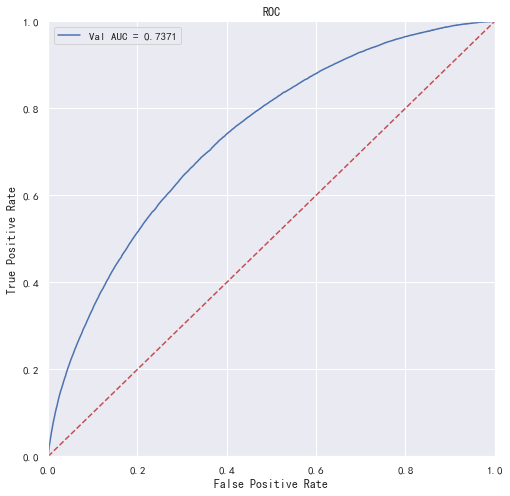

In [7]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

### 搞不清楚这两个什么不一样 简单点

In [8]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'bagging_fraction': 0.7,
                'seed': 2020,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=800, valid_sets=valid_matrix, verbose_eval=400, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[383]	valid_0's auc: 0.735065
[0.7350654099793839]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[392]	valid_0's auc: 0.731587
[0.7350654099793839, 0.7315865836305316]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[330]	valid_0's auc: 0.734381
[0.7350654099793839, 0.7315865836305316, 0.7343806774000213]
************************************ 4 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[509]	valid_0's auc: 0.734204
[0.7350654099793839, 0.7315865836305316, 0.7343806774000213, 0.73

**模型参数已经确定，建立最终模型并对验证集进行验证**

通过5折交叉验证可以发现，模型迭代次数在3600次的时候会停止，那么我们在建立新模型时直接设置最大迭代次数，并使用验证集进行模型预测

还是不会保存模型

In [9]:
"""保存模型到本地"""
# 保存模型
import pickle
# pickle.dump(final_model_lgb, open('model/model_lgb_best.txt', 'wb'))

lgb.save_model('model.txt')

AttributeError: module 'lightgbm' has no attribute 'save_model'

X这里不好！！

In [ ]:
test = pd.read_csv('cf-testa.csv', index_col='id')

In [ ]:
pre = model.predict(X_test)
pd.Series(pre, name='isDefault', index=test.index).reset_index().to_csv('sub_lgb_base.csv', index=False)

In [ ]:
test.index

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(60,40))
lgb.plot_importance(model, max_num_features=30)
plt.title("Importances")
plt.show()
plt.savefig('lgbm_importances-01.png')